<a href="https://colab.research.google.com/github/kiranbab/computer-vision/blob/main/Shoe_landmark_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/four.csv"
df = pd.read_csv(file_path)
df.head(2)

,image,id,kp-1,label,annotator,annotation_id,created_at,updated_at,lead_time
0,https://cdn.pixelbin.io/v2/flat-star-326401/or...,528639,"[{""x"": 41.42928904868291, ""y"": 35.832373692326...","[{""x"": 36.21779447755237, ""y"": 35.497705354349...",1029,164732,2023-12-28T14:18:11.492974Z,2024-01-10T06:06:52.549372Z,91.549
1,https://cdn.pixelbin.io/v2/flat-star-326401/or...,527484,"[{""x"": 26.592178770949722, ""y"": 26.29815745393...","[{""x"": 16.08938547486035, ""y"": 23.913876896218...",1029,163880,2023-12-28T07:39:47.508531Z,2024-01-10T06:05:25.803555Z,203.163


In [ ]:
file_path = "/content/shoe_376_data.csv"
df = pd.read_csv(file_path)
df.head()

,image,id,kp-1,label,annotator,annotation_id,created_at,updated_at,lead_time
0,https://cdn.pixelbin.io/v2/flat-star-326401/or...,534297,"[{""x"": 43.24022346368715, ""y"": 43.478260869565...","[{""x"": 31.508379888268166, ""y"": 37.45819397993...",1029,168971,2024-01-02T12:57:37.446485Z,2024-01-03T04:45:03.356468Z,56883.899
1,https://cdn.pixelbin.io/v2/flat-star-326401/or...,534298,"[{""x"": 24.24581005586592, ""y"": 94.147157190635...","[{""x"": 15.642458100558635, ""y"": 27.59197324414...",1029,168970,2024-01-02T12:56:57.721904Z,2024-01-02T12:56:57.721915Z,41.078
2,https://cdn.pixelbin.io/v2/flat-star-326401/or...,534299,"[{""x"": 38.72949902381047, ""y"": 33.470194039224...","[{""x"": 31.60826855814209, ""y"": 33.189234164537...",1029,168969,2024-01-02T12:56:14.886989Z,2024-01-02T12:56:14.887000Z,38.772
3,https://cdn.pixelbin.io/v2/flat-star-326401/or...,534300,"[{""x"": 47.432432432432435, ""y"": 0.202429149797...","[{""x"": 22.2972972972973, ""y"": 0, ""width"": 27.1...",1029,168968,2024-01-02T12:55:34.329280Z,2024-01-02T12:55:34.329292Z,140.798
4,https://cdn.pixelbin.io/v2/flat-star-326401/or...,534301,"[{""x"": 13.519553072625698, ""y"": 59.86622073578...","[{""x"": 0, ""y"": 57.859531772575274, ""width"": 18...",1029,168967,2024-01-02T12:53:11.777034Z,2024-01-02T12:53:11.777046Z,51.880


Image  downloaded successfully as sample.jpg
{'x': 56.02295157310713, 'y': 29.036447083054902, 'width': 0.30165912518853694, 'keypointlabels': ['tip'], 'original_width': 1000, 'original_height': 1000}
16


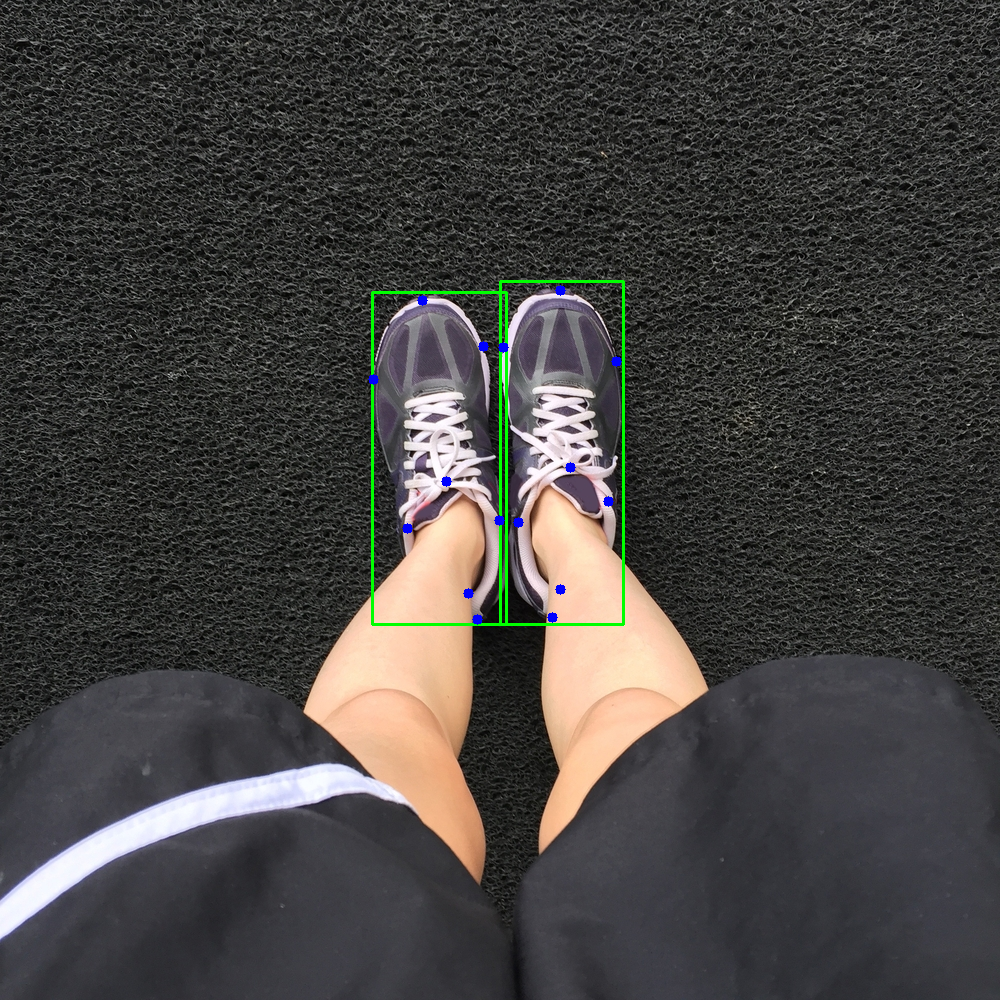

In [ ]:
import json
import cv2
import requests
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/sample.jpg")

for index, row in df.head(10).iterrows():
    if index == 2:
      image_url = row['image']
      response = requests.get(image_url, stream=True)
      filename = "sample.jpg"
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              for chunk in response.iter_content(chunk_size=128):
                  file.write(chunk)
          print(f"Image  downloaded successfully as {filename}")
      else:
          print(f"Failed to download image . Status code: {response.status_code}")

      image_id = row['id']
      kp_1 = json.loads(row['kp-1'])
      lable = json.loads(row['label'])
      index =8
      index1=1
      print(kp_1[index1])
      print(len(kp_1))
      image = cv2.imread("/content/sample.jpg")
      for intIndex,rectObj in enumerate(lable):
        x=int(lable[intIndex]['x'] *lable[intIndex]['original_width']* 0.01)
        y=int(lable[intIndex]['y'] *lable[intIndex]['original_height'] * 0.01)
        width =int(lable[intIndex]['width'] *lable[intIndex]['original_width'] * 0.01 )
        height =int(lable[intIndex]['height'] *lable[intIndex]['original_height']* 0.01)
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

      for intIndex, landObj in enumerate(kp_1):
          cv2.circle(image, (int(landObj['x'] *landObj['original_width']* 0.01),int(landObj['y'] *landObj['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2_imshow( image)


In [ ]:
import requests
import os

image_url = "https://cdn.pixelbin.io/v2/flat-star-326401/original/label-studio/upload/1355/54e61b8f-barefoot_56.jpeg"
response = requests.get(image_url, stream=True)
filename = "sample.jpg"
if response.status_code == 200:
    with open(filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)
    print(f"Image  downloaded successfully as {filename}")
else:
    print(f"Failed to download image . Status code: {response.status_code}")


Image  downloaded successfully as sample.jpg


In [ ]:
0.4791666666666667*720, 0.42916666666666664*720,0.25555555555555554*720, 0.5361111111111111*720

(345.0, 309.0, 184.0, 386.0)

In [ ]:
345-184/2,309.0 -386.0/2,345+184/2,309.0 +386.0/2

(253.0, 116.0, 437.0, 502.0)

(720, 720, 3)


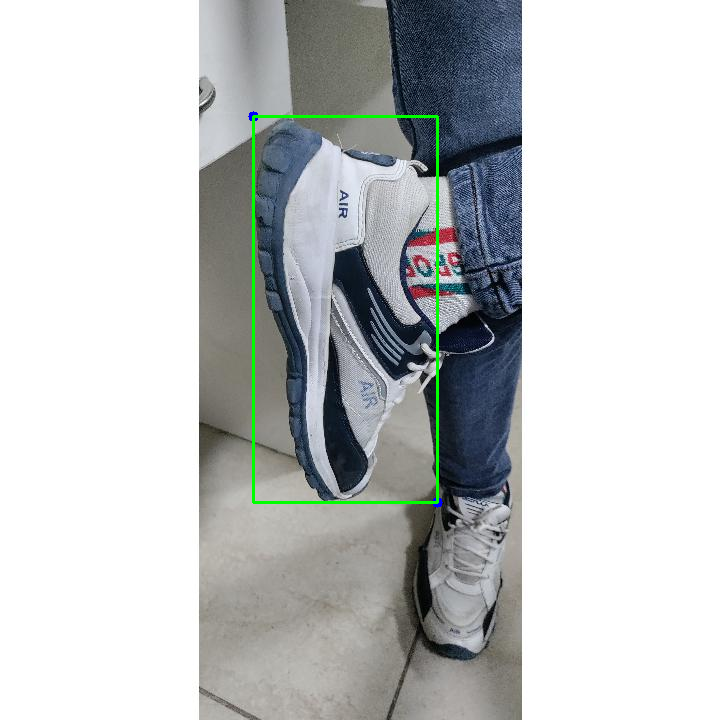

In [ ]:
import json
import cv2
import requests
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/wider_13.jpg")
print(image.shape)
cv2.circle(image, (253,116), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
cv2.circle(image, (437,502), 5, (255, 0, 0), -1)
cv2.rectangle(image, (253,116), (437,502), (0, 255, 0), 2)
cv2_imshow( image)

In [ ]:
import json
import cv2
import requests
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/sample.jpg")

for index1, row in df.head(1).iterrows():
    # if index1 == 3:
      image_url = row['image']
      response = requests.get(image_url, stream=True)
      filename = "sample.jpg"
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              for chunk in response.iter_content(chunk_size=128):
                  file.write(chunk)
          print(f"Image  downloaded successfully as {filename}")
      else:
          print(f"Failed to download image . Status code: {response.status_code}")

      image_id = row['id']
      kp_1 = json.loads(row['kp-1'])
      lable = json.loads(row['label'])
      index =-1
      indexB =0
      print(kp_1[indexB])
      print(lable[indexB])
      x=int(lable[indexB]['x'] *lable[indexB]['original_width']* 0.01)
      y=int(lable[indexB]['y'] *lable[indexB]['original_height'] * 0.01)
      width =int(lable[indexB]['width'] *lable[indexB]['original_width'] * 0.01 )
      height =int(lable[indexB]['height'] *lable[indexB]['original_height']* 0.01)
      image = cv2.imread("/content/sample.jpg")
      cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

      cv2.circle(image, (int(kp_1[index+1]['x'] *kp_1[index+1]['original_width']* 0.01),int(kp_1[index+1]['y'] *kp_1[index+1]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+3]['x'] *kp_1[index+3]['original_width']* 0.01),int(kp_1[index+3]['y'] *kp_1[index+3]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+5]['x'] *kp_1[index+5]['original_width']* 0.01),int(kp_1[index+5]['y'] *kp_1[index+5]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+7]['x'] *kp_1[index+7]['original_width']* 0.01),int(kp_1[index+7]['y'] *kp_1[index+7]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+9]['x'] *kp_1[index+9]['original_width']* 0.01),int(kp_1[index+9]['y'] *kp_1[index+9]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+11]['x'] *kp_1[index+11]['original_width']* 0.01),int(kp_1[index+11]['y'] *kp_1[index+11]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+13]['x'] *kp_1[index+13]['original_width']* 0.01),int(kp_1[index+13]['y'] *kp_1[index+13]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+15]['x'] *kp_1[index+15]['original_width']* 0.01),int(kp_1[index+15]['y'] *kp_1[index+15]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle


      cv2_imshow( image)


Image  downloaded successfully as sample.jpg
{'x': 12.005267112408418, 'y': 59.6306032483596, 'width': 0.13192612137203166, 'keypointlabels': ['tip_L'], 'original_width': 640, 'original_height': 640}
{'x': 7.123551855653074, 'y': 13.58804286569314, 'width': 88.78675553785774, 'height': 56.59667537502001, 'rotation': 0, 'rectanglelabels': ['shoe_L'], 'original_width': 640, 'original_height': 640}


IndexError: list index out of range

Image  downloaded successfully as sample.jpg
{'x': 38.78627968337731, 'y': 39.050131926121374, 'width': 0.13192612137203166, 'keypointlabels': ['thumb_L'], 'original_width': 640, 'original_height': 640}
{'x': 59.63060505425896, 'y': 22.82331651592675, 'width': 31.794343334406836, 'height': 48.68104849801931, 'rotation': 0, 'rectanglelabels': ['shoe_R'], 'original_width': 640, 'original_height': 640}


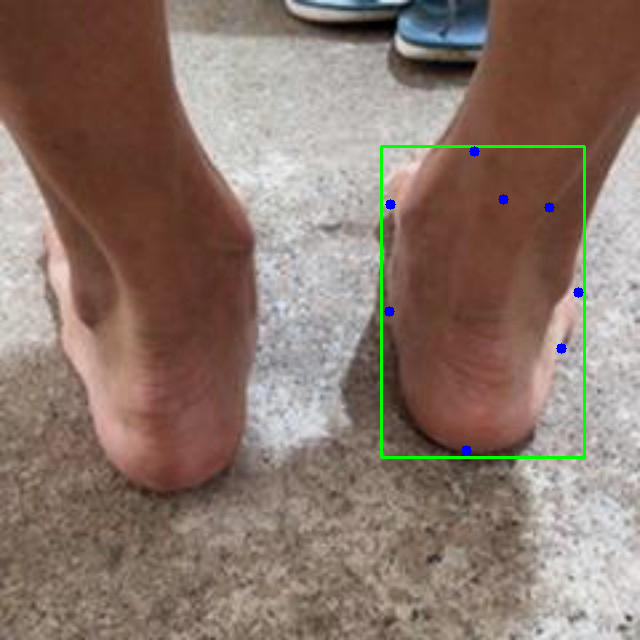

In [ ]:
import json
import cv2
import requests
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/sample.jpg")

for index, row in df.head(2).iterrows():
    if index == 1:
      image_url = row['image']
      response = requests.get(image_url, stream=True)
      filename = "sample.jpg"
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              for chunk in response.iter_content(chunk_size=128):
                  file.write(chunk)
          print(f"Image  downloaded successfully as {filename}")
      else:
          print(f"Failed to download image . Status code: {response.status_code}")

      image_id = row['id']
      kp_1 = json.loads(row['kp-1'])
      lable = json.loads(row['label'])
      index =8
      index1=1
      print(kp_1[index1])
      print(lable[index1])
      x=int(lable[index1]['x'] *lable[index1]['original_width']* 0.01)
      y=int(lable[index1]['y'] *lable[index1]['original_height'] * 0.01)
      width =int(lable[index1]['width'] *lable[index1]['original_width'] * 0.01 )
      height =int(lable[index1]['height'] *lable[index1]['original_height']* 0.01)
      image = cv2.imread("/content/sample.jpg")
      cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

      cv2.circle(image, (int(kp_1[index+0]['x'] *kp_1[index+0]['original_width']* 0.01),int(kp_1[index+0]['y'] *kp_1[index+0]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+1]['x'] *kp_1[index+1]['original_width']* 0.01),int(kp_1[index+1]['y'] *kp_1[index+1]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+2]['x'] *kp_1[index+2]['original_width']* 0.01),int(kp_1[index+2]['y'] *kp_1[index+2]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+3]['x'] *kp_1[index+3]['original_width']* 0.01),int(kp_1[index+3]['y'] *kp_1[index+3]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+4]['x'] *kp_1[index+4]['original_width']* 0.01),int(kp_1[index+4]['y'] *kp_1[index+4]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+5]['x'] *kp_1[index+5]['original_width']* 0.01),int(kp_1[index+5]['y'] *kp_1[index+5]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+6]['x'] *kp_1[index+6]['original_width']* 0.01),int(kp_1[index+6]['y'] *kp_1[index+6]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+7]['x'] *kp_1[index+7]['original_width']* 0.01),int(kp_1[index+7]['y'] *kp_1[index+7]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle


      cv2_imshow( image)


In [ ]:
import json
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/sample.jpg")

for index, row in df.head(10).iterrows():
    if index == 5:
      image_url = row['image']
      response = requests.get(image_url, stream=True)
      filename = "sample.jpg"
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              for chunk in response.iter_content(chunk_size=128):
                  file.write(chunk)
          print(f"Image  downloaded successfully as {filename}")
      else:
          print(f"Failed to download image . Status code: {response.status_code}")

      image_id = row['id']
      kp_1 = json.loads(row['kp-1'])
      lable = json.loads(row['label'])
      index =-1
      print(kp_1[index])
      print(lable[index])
      x=int(lable[index+1]['x'] *lable[index+1]['original_width']* 0.01)
      y=int(lable[index+1]['y'] *lable[index+1]['original_height'] * 0.01)
      width =int(lable[index+1]['width'] *lable[index+1]['original_width'] * 0.01 )
      height =int(lable[index+1]['height'] *lable[index+1]['original_height']* 0.01)
      image = cv2.imread("/content/sample.jpg")
      cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

      cv2.circle(image, (int(kp_1[index+1]['x'] *kp_1[index+1]['original_width']* 0.01),int(kp_1[index+1]['y'] *kp_1[index+1]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+3]['x'] *kp_1[index+3]['original_width']* 0.01),int(kp_1[index+3]['y'] *kp_1[index+3]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+5]['x'] *kp_1[index+5]['original_width']* 0.01),int(kp_1[index+5]['y'] *kp_1[index+5]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+7]['x'] *kp_1[index+7]['original_width']* 0.01),int(kp_1[index+7]['y'] *kp_1[index+7]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+9]['x'] *kp_1[index+9]['original_width']* 0.01),int(kp_1[index+9]['y'] *kp_1[index+9]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+11]['x'] *kp_1[index+11]['original_width']* 0.01),int(kp_1[index+11]['y'] *kp_1[index+11]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+13]['x'] *kp_1[index+13]['original_width']* 0.01),int(kp_1[index+13]['y'] *kp_1[index+13]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
      cv2.circle(image, (int(kp_1[index+15]['x'] *kp_1[index+15]['original_width']* 0.01),int(kp_1[index+15]['y'] *kp_1[index+15]['original_height'] * 0.01)), 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle


      cv2_imshow( image)


Image  downloaded successfully as sample.jpg
{'x': 60.29026365255913, 'y': 37.07123559079251, 'width': 0.13192612137203166, 'keypointlabels': ['shoelace_right_R'], 'original_width': 640, 'original_height': 640}
{'x': 4.089606826269636, 'y': 28.232358825204614, 'width': 71.10850267550997, 'height': 28.100362273757536, 'rotation': 0, 'rectanglelabels': ['shoe_R'], 'original_width': 640, 'original_height': 640}


IndexError: list index out of range

{'x': 43.24022346368715, 'y': 43.47826086956522, 'width': 0.12484004868761898, 'keypointlabels': ['tip'], 'original_width': 500, 'original_height': 334}
{'x': 31.508379888268166, 'y': 37.45819397993303, 'width': 21.229050279329588, 'height': 62.54180602006676, 'rotation': 0, 'rectanglelabels': ['Shoe'], 'original_width': 500, 'original_height': 334}
16
(334, 500, 3)


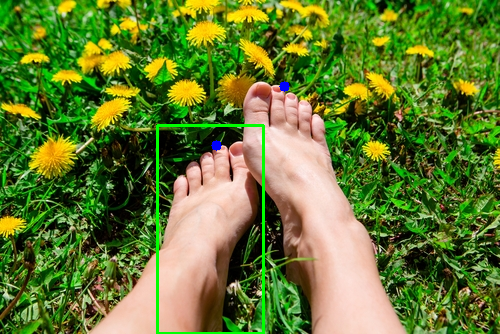

In [ ]:
import json
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread("/content/sample.jpg")

for index, row in df.head(1).iterrows():
    image_id = row['id']
    kp_1 = json.loads(row['kp-1'])
    lable = json.loads(row['label'])

    lablefile = f'/content/labels/{image_id}.txt'
    print(kp_1[0])
    print(lable[0])

    print(len(kp_1))
    print(image.shape)
    point = (int(216.20111731843573),int(145.21739130434784))
    point2 = (int(284.35754189944134),int(86.57190635451504))
    x=int(157.54189944134083)
    y=int(125.11036789297631)
    width =int(106.14525139664795)
    height =int(208.88963210702298)

    cv2.circle(image, point, 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
    cv2.circle(image, point2, 5, (255, 0, 0), -1)  # 5 is the radius, (0, 255, 0) is the color (in BGR format), -1 is for filling the circle
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    cv2_imshow( image)
    # plt.imshow(image)